# Deep Neural Networks Laboration

### **Quick introduction to jupyter notebooks**
* Each cell in this notebook contains either code or text.
* You can run a cell by pressing Ctrl-Enter, or run and advance to the next cell with Shift-Enter.
* Code cells will print their output, including images, below the cell. Running it again deletes the previous output, so be careful if you want to save some results.
* You don't have to rerun all cells to test changes, just rerun the cell you have made changes to. Some exceptions might apply, for example if you overwrite variables from previous cells, but in general this will work.
* If all else fails, use the "Kernel" menu and select "Restart Kernel and Clear All Output". You can also use this menu to run all cells.
* A useful debug tool is the console. You can right-click anywhere in the notebook and select "New console for notebook". This opens a python console which shares the environment with the notebook, which let's you easily print variables or test commands.

In [2]:
# Setups
# Automatically reload modules when changed
%reload_ext autoreload
%autoreload 2

### **Your task**
Your task is to make a DNN that can classify benign or malicious networks attacks using the Mirai dataset (see below). 

**You need to answer all the questions in the notebook.** Also, for all classification tasks that you will explore, you should always answer these two questions:
- How good classification accuracy can a naive classifier obtain? The naive classifier will assume that all examples belong to one class.
- What is random chance classification accuracy if you randomly guess the label of each (test) example? For a balanced dataset and binary classification this is easy (50%), but in many cases it is more complicated and a Monte Carlo simulation may be required to estimate random chance accuracy.

If your classifier cannot perform better than a naive classifier or a random classifier, you are doing something wrong.

If the training is too slow on your own computer, use the smaller datasets (*half or *quarter).

Dense networks are not optimal for tabular datasets like the one used here, but here the main goal is to explore and get a a hands-on experience with deep learning.

# Part 1: The Dataset #

Data used in this laboration are from the [Kitsune Network Attack Datase](https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset). We will focus on the 'Mirai' part of the dataset. Your task is to make a DNN that can classify if each attack is benign or malicious. The dataset has 116 covariates, but to make it a bit more difficult we will remove the first 24 covariates.

### **1.1 Load the data**
Complete and run the following cell to to load the the `Mirai_data.npy` and the `Mirai_labels.npy` files and remove the first 24 covariances to make the classification task harder.

In [2]:
import os
from numpy import genfromtxt # ! Not needed if you load data from numpy arrays !
import numpy as np

# Load data from numpy arrays, choose reduced files if the training takes too long
# Load the dataset
X = np.load('Mirai_data.npy')
Y = np.load('Mirai_labels.npy')

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Remove the first 24 covariates (columns)
X = X[:,24:]
Y = Y

# Print the size of the covariates and labels
print(np.shape(X))
print(np.shape(Y))
# ============================================

(764137, 92)
(764137,)


### **1.2 Explore the data (NaNs)**
It is common to have NaNs (not a number) in the data, lets check for it.

In [3]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()

# Fist check for NaNs in the data and then in the labels
print(np.isnan(Y).sum())
# Print the number of NaNs in the covariates
print(np.isnan(X).sum())
# ============================================

0
0


### **1.3 Data preprocessing: normalization**

In [4]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Convert covariates to floats
X = X.astype(float)

# Convert labels to integers
Y = Y.astype(int)

# Remove mean of each covariate (column)
X = X - np.mean(X, axis=0)

# Divide each covariate (column) by its standard deviation
X = X / np.std(X, axis=0)

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std
print(np.mean(X, axis=0))
print(np.std(X, axis=0))
# ============================================


[-3.19451533e-18 -6.32970181e-14  1.19926356e-13  4.56743018e-15
  4.10210037e-14  1.46130975e-13  5.85246484e-16 -1.69734859e-14
 -3.36915700e-13  1.28688437e-12 -2.69360995e-12 -1.10733213e-13
 -1.22392702e-13 -1.70649630e-13 -1.02461166e-14  2.50701280e-12
  1.47553162e-12  1.08446837e-12 -1.04981959e-13  6.83458762e-14
 -1.03373555e-13  5.98825773e-14 -1.02025960e-12 -1.68983055e-12
 -1.79101143e-12 -1.31828514e-13  4.42580403e-13  6.14635580e-13
  5.78048199e-14 -4.92623328e-13 -2.54513072e-12  1.86544900e-13
 -1.53444593e-13  1.68079591e-12  9.30041709e-13  1.50738177e-13
 -1.15688852e-12 -3.62610361e-13 -1.71390937e-12 -2.09264067e-13
  1.07161976e-12 -1.45236885e-12 -1.69724579e-14 -1.64918984e-16
 -5.13444996e-14 -1.02171349e-14 -1.74685907e-15  1.34264921e-13
  5.98801969e-14  1.48745574e-17 -4.25442340e-13  5.78079594e-14
  1.25638129e-15  1.69449684e-13  1.50725881e-13  2.14439542e-14
  3.65457183e-14  1.17260451e-13 -8.82752870e-13 -6.34816648e-13
 -1.62109649e-12  2.63270

Note: The mean is not exactly 0 for all covariates, probably due to some minor inaccuracies in the calculation.

### **1.4 Data split**
Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables:
- `Xtrain` and `Ytrain`  (70% of the dataset)
- `Xtemp` and `Ytemp`  (30% of the dataset)

We use a function from scikit learn (see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for more details)

In [5]:
from sklearn.model_selection import train_test_split

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# split the original dataset into 70% Training and 30% Temp
Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Print the number of examples of each class, for the training data and the remaining 30%
print(np.unique(Ytrain, return_counts=True))
print(np.unique(Ytemp, return_counts=True))
# ============================================

print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

(array([0, 1]), array([ 85248, 449647], dtype=int64))
(array([0, 1]), array([ 36373, 192869], dtype=int64))
Xtrain has size (534895, 92).
Ytrain has size (534895,).
Xtemp has size (229242, 92).
Ytemp has size (229242,).


Now split your non-training data (`Xtemp`, `Ytemp`) into 50% validation (`Xval`, `Yval`) and 50% testing (`Xtest`, `Ytest`), we use a function from scikit learn. In total this gives us 70% for training, 15% for validation, 15% for test.

In [7]:
from sklearn.model_selection import train_test_split

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# split the remaining 30% into 50% Validation and 50% Test
Xval, Xtest, Yval, Ytest = train_test_split(Xtemp, Ytemp, test_size=0.5, random_state=42)

# ============================================

print(f'The validation set has size {Xval.shape[0]}')
print(f'The test set has size {Xtest.shape[0]}')

The validation set has size 114621
The test set has size 114621


In [7]:
X.shape[0] * 0.15

114620.55

In [8]:
# Get shapes for the training, validation and test sets
print(Xtrain.shape, Ytrain.shape)
print(Xval.shape, Yval.shape)
print(Xtest.shape, Ytest.shape)

(534895, 92) (534895,)
(114621, 92) (114621,)
(114621, 92) (114621,)


In [9]:
# calculate test accuracy for a naive classifier
print(np.unique(Ytest, return_counts=True)[1][0] / np.shape(Ytest)[0])
print(np.unique(Ytest, return_counts=True)[1][1] / np.shape(Yval)[0])

0.1577546871864667
0.8422453128135333


#### **<span style="color:red">Questions</span>**
1. Do all variables (`Xtrain`,`Ytrain`), (`Xval`,`Yval`), (`Xtest`,`Ytest`) have the shape that you expect?
2. Given the number of examples from each class, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by guessing that all examples belong to one class.

Note, that if your classifier cannot perform better than a naive classifier or a random classifier, you are doing something wrong.


#### **<span style="color:green">Answer</span>**
1. All variables have the expected shape with 92 covariates and the respective proportion of total data points. 
2. The test accuracy for a naive classifier that assumes that everything belongs to class 1 would be 0.84.

In [11]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 
else:
    print('No GPU available.')

No GPU available.


# Part 2: DNN classification
In this next section you will define utilities for building the deep learning networks that will be used later and for visualizing the model training. You will also train several model experimenting with different model architecture configurations and methods for model regularization.

### **2.1 Build DNN model**
Implement the `build_DNN` and `plot_results` functions in the `utilities.py` file. Note that for the changes in the `utilities.py` definitions to be visible by the notebook, you need to save the file. 

Here are some relevant functions that you should use in `build_DNN`. For a complete list of functions and their definitions see the [keras documentation](https://keras.io/api/):

- `model.add()`, adds a layer to the network;
- `Dense()`, a dense network layer. See the [documentation](https://keras.io/api/layers/core_layers/dense/) what are the input options and outputs of the `Dense()` function. 
- `model.compile()`, compiles the model. You can set the input metrics=['accuracy'] to print the classification accuracy during the training.
- cost and loss functions: check the [documentation](https://keras.io/losses/) and chose a loss function for binary classification.

To get more information in model [compile](https://keras.io/api/models/model_training_apis/#compile-method), [training](https://keras.io/api/models/model_training_apis/#fit-method) and [evaluation](https://keras.io/api/models/model_training_apis/#evaluate-method) see the relevant documentation.

After defining the`build_DNN` function use it to create the your first DNN classifier. Start with a simple network with 2 dense layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

Make sure that the last layer always has a sigmoid activation function (why?).

In [8]:
from utilities import build_DNN, plot_results, train_DNN
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# import a suitable loss function from keras.losses and use as input to the build_DNN function.

# Build a DNN model following the specifications above
model = build_DNN(input_shape=Xtrain.shape[1], n_hidden_layers=2, n_hidden_units=20, loss="binary_crossentropy", act_fun="sigmoid")

# ============================================

### **2.2 Train DNN model**

Time to train the DNN!
Start simple with 2 hidden layers with 20 nodes each.

Build set the different hyper-parameters, build the model and run the training. Use the following training and hyper-parameters:
- `batch_size=20`
- `epochs=20`
- `learning_rate=0.1`

Make sure that you are using learning rate 0.1 !

### 2 hidden layers with 20 nodes each

In [13]:
# Setup some training and hyper-parameters
batch_size = 10000
epochs = 20

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Specify the learning rate, the input shape and the loss function
learning_rate = 0.1
input_shape = Xtrain.shape[1]
loss = "binary_crossentropy"

model_config = {
    'learning_rate': learning_rate,
    'input_shape': input_shape,
    'loss': loss,
    'act_fun': 'sigmoid',
    'n_hidden_layers': 2,
    'n_hidden_units': 20
}
train_config = {
    'batch_size': batch_size,
    'epochs': epochs
}
# Train the model, provide training data and validation data
history1 = train_DNN( model_config, (Xtrain, Ytrain, Xval, Yval), train_config)
# ============================================

Epoch 1/20

54/54 [==============================] - 1s 9ms/step - loss: 0.4330 - accuracy: 0.8278 - val_loss: 0.3841 - val_accuracy: 0.8404
Epoch 2/20
51/54 [===========================>..] - ETA: 0s - loss: 0.3590 - accuracy: 0.8407

c:\Users\jakob\Documents\venvs\732A82\Lib\site-packages\ray\train\_internal\session.py:652: UserWarning: `report` is meant to only be called inside a function that is executed by a Tuner or Trainer. Returning `None`.
  warnings.warn(


54/54 [==============================] - 0s 4ms/step - loss: 0.3577 - accuracy: 0.8406 - val_loss: 0.3280 - val_accuracy: 0.8404
Epoch 3/20
54/54 [==============================] - 0s 4ms/step - loss: 0.3005 - accuracy: 0.8406 - val_loss: 0.2724 - val_accuracy: 0.8405
Epoch 4/20
54/54 [==============================] - 0s 4ms/step - loss: 0.2529 - accuracy: 0.8489 - val_loss: 0.2343 - val_accuracy: 0.8581
Epoch 5/20
54/54 [==============================] - 0s 4ms/step - loss: 0.2242 - accuracy: 0.8675 - val_loss: 0.2137 - val_accuracy: 0.8776
Epoch 6/20
54/54 [==============================] - 0s 4ms/step - loss: 0.2090 - accuracy: 0.8862 - val_loss: 0.2026 - val_accuracy: 0.8971
Epoch 7/20
54/54 [==============================] - 0s 4ms/step - loss: 0.2006 - accuracy: 0.8997 - val_loss: 0.1961 - val_accuracy: 0.9029
Epoch 8/20
54/54 [==============================] - 0s 4ms/step - loss: 0.1953 - accuracy: 0.9024 - val_loss: 0.1917 - val_accuracy: 0.9042
Epoch 9/20
54/54 [=============

In [14]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Evaluate the model on the test data
score = history1.model.evaluate(Xtest, Ytest)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 3s 805us/step - loss: 0.1740 - accuracy: 0.9066
Test loss: 0.1740
Test accuracy: 0.9066


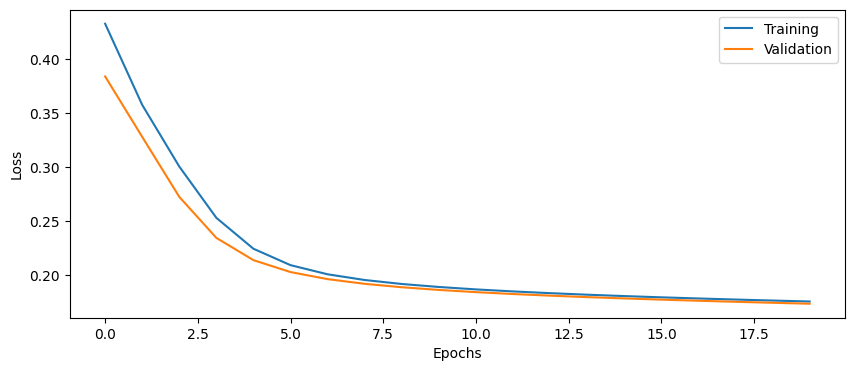

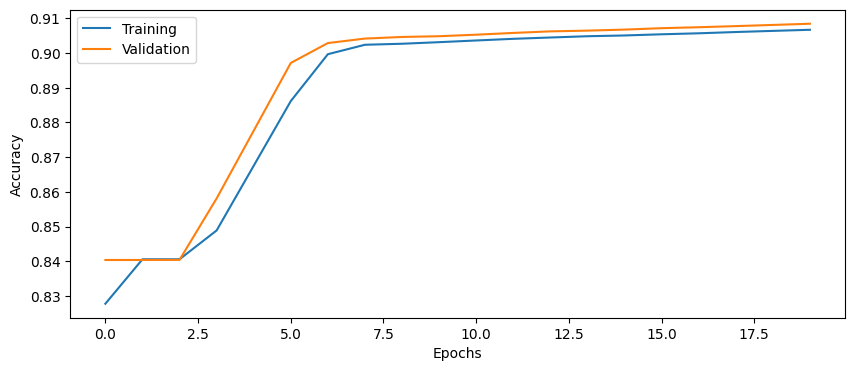

In [15]:
from utilities import plot_results

# Plot the history from the training run
plot_results(history1)

#### **<span style="color:red">Questions</span>**

3. What happens if you add several Dense layers without specifying the activation function?

4. How are the weights in each dense layer initialized as default? How are the bias weights initialized?

#### **<span style="color:green">Answers</span>**
[Your answers here]


### **2.2 Adressing class imbalance**

This dataset is rather unbalanced with the majority of the samples belonging to class=1. We need to define class weights so that the training pays more attention to the class with fewer samples. We use the [`compute_class_weight`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html) function from `scikit-learn`.

You need to call the function something like this
```python
class_weights = class_weight.compute_class_weight(class_weight = , classes = , y = )
```

otherwise it will through an error.

In [17]:
history1.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                1860      
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2301 (8.99 KB)
Trainable params: 2301 (8.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
from sklearn.utils import class_weight

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Calculate class weights
value1, value2 = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(Ytrain), y=Ytrain)

# Print the class weights
print(value1, value2)

# ============================================

# Convert class weights into a dictionary that can be used as input to the model.fit() function

class_weights = {0: value1,
                1: value2}

3.1372876783033035 0.5947943609097803


### Train a model using class weights. 2 hidden layers with 20 nodes each


In [9]:
# Setup some training and hyper-parameters
batch_size = 1000
epochs = 20

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Specify the learning rate, the input shape and the loss function
learning_rate = 0.1
input_shape = Xtrain.shape[1]
loss = "binary_crossentropy"

model_config = {
    'learning_rate': learning_rate,
    'input_shape': input_shape,
    'loss': loss,
    'act_fun': 'sigmoid',
    'n_hidden_layers': 2,
    'n_hidden_units': 20
}
train_config = {
    'batch_size': batch_size,
    'epochs': epochs,
    'class_weight': class_weights
}
# Train the model, provide training data and validation data
history2 = train_DNN( model_config, (Xtrain, Ytrain, Xval, Yval), train_config)
# ============================================


Epoch 1/20

535/535 [==============================] - 1s 2ms/step - loss: 0.3123 - accuracy: 0.8843 - val_loss: 0.2490 - val_accuracy: 0.8949
Epoch 2/20
127/535 [======>.......................] - ETA: 0s - loss: 0.2024 - accuracy: 0.8939

c:\Users\jakob\Documents\venvs\732A82\Lib\site-packages\ray\train\_internal\session.py:652: UserWarning: `report` is meant to only be called inside a function that is executed by a Tuner or Trainer. Returning `None`.
  warnings.warn(


535/535 [==============================] - 1s 1ms/step - loss: 0.1955 - accuracy: 0.8968 - val_loss: 0.2307 - val_accuracy: 0.9012
Epoch 3/20
535/535 [==============================] - 1s 1ms/step - loss: 0.1850 - accuracy: 0.9026 - val_loss: 0.2231 - val_accuracy: 0.9082
Epoch 4/20
535/535 [==============================] - 1s 1ms/step - loss: 0.1792 - accuracy: 0.9086 - val_loss: 0.2215 - val_accuracy: 0.9114
Epoch 5/20
535/535 [==============================] - 1s 1ms/step - loss: 0.1755 - accuracy: 0.9104 - val_loss: 0.2155 - val_accuracy: 0.9125
Epoch 6/20
535/535 [==============================] - 1s 1ms/step - loss: 0.1730 - accuracy: 0.9109 - val_loss: 0.2138 - val_accuracy: 0.9130
Epoch 7/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1711 - accuracy: 0.9127 - val_loss: 0.2133 - val_accuracy: 0.9157
Epoch 8/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1697 - accuracy: 0.9142 - val_loss: 0.2071 - val_accuracy: 0.9166
Epoch 9/20
535/53

In [ ]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Evaluate model on test data
score = history2.model.evaluate(Xtest, Ytest)

# ============================================
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 2s 686us/step - loss: 0.1490 - accuracy: 0.9334
Test loss: 0.1490
Test accuracy: 0.9334


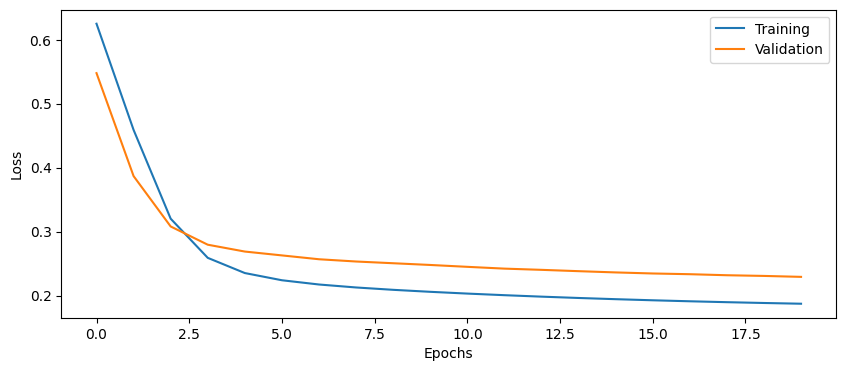

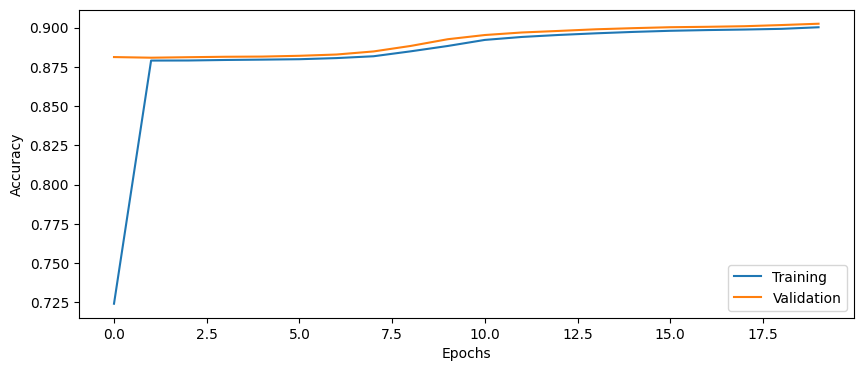

In [ ]:
plot_results(history2)

### **Additional questions**
#### **<span style="color:red">Questions</span>**

5. Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.

6. What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results. 

7. How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000?  

8. What limits how large the batch size can be?

9.  Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?
10. How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()
   
#### **<span style="color:green">Answers</span>**
5. The memory is a limiting factor, therefore we have to use batches to load fewer data at the same time.  

6. For batch size 100 one epoch takes 5249*1 ms=5249 ms . For batch size 1,000 one epoch takes 535*1 ms = 525ms. For batch size 10,000 one epoch takes 54*3 ms = 162ms. For smaller batch sizes the CPU is not fully used, therefore much potential is wasted. Additionally, more weight updates have to be performed.  

7. The weights are updated in every step, therefore we get the following numbers for the respective batch sizes. For 100 it is 5249 updates, for 1,000 535 and for 10,000 only 54.   

8. The dedicated memory for the CPU or the GPU limits the batch size, as the data must fit in there.

9. For decreasing batch size the learning rate should also be decreased, because the weights are updated more frequently.

10. The initial model with 2 layers and 20 hidden units each has 2,301 trainable parameters. The model with 4 layers and 50 nodes each has 12,351.

In [ ]:
# Setup some training and hyper-parameters
batch_size = 1000
epochs = 20

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Specify the learning rate, the input shape and the loss function
learning_rate = 0.1
input_shape = Xtrain.shape[1]
loss = "binary_crossentropy"

model_config = {
    'learning_rate': learning_rate,
    'input_shape': input_shape,
    'loss': loss,
    'act_fun': 'sigmoid',
    'n_hidden_layers': 4,
    'n_hidden_units': 50
}
train_config = {
    'batch_size': batch_size,
    'epochs': epochs,
    'class_weight': class_weights
}
# Train the model, provide training data and validation data
history3 = train_DNN( model_config, (Xtrain, Ytrain, Xval, Yval), train_config)
# ============================================

Epoch 1/20
535/535 [==============================] - 2s 3ms/step - loss: 0.6780 - accuracy: 0.6767 - val_loss: 0.6230 - val_accuracy: 0.8838
Epoch 2/20
535/535 [==============================] - 1s 2ms/step - loss: 0.3086 - accuracy: 0.8847 - val_loss: 0.2484 - val_accuracy: 0.8940
Epoch 3/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1962 - accuracy: 0.8961 - val_loss: 0.2329 - val_accuracy: 0.9001
Epoch 4/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1851 - accuracy: 0.9025 - val_loss: 0.2264 - val_accuracy: 0.9085
Epoch 5/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1793 - accuracy: 0.9090 - val_loss: 0.2183 - val_accuracy: 0.9125
Epoch 6/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1758 - accuracy: 0.9107 - val_loss: 0.2184 - val_accuracy: 0.9128
Epoch 7/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1735 - accuracy: 0.9117 - val_loss: 0.2228 - val_accuracy: 0.9131
Epoch 

In [ ]:
history3.model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 50)                4650      
                                                                 
 dense_80 (Dense)            (None, 50)                2550      
                                                                 
 dense_81 (Dense)            (None, 50)                2550      
                                                                 
 dense_82 (Dense)            (None, 50)                2550      
                                                                 
 dense_83 (Dense)            (None, 1)                 51        
                                                                 
Total params: 12351 (48.25 KB)
Trainable params: 12351 (48.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **2.3 Model regularization**

In the following sections you will explore methods for model normalization, namely `BatchNormalization` and `Dropout`, and also look at the impact of ofter activation functions and optimization algorithms.
#### **2.3.1 Batch normalization**

Now add batch normalization after each hidden dense layer in `build_DNN`.

See the [documentation](https://keras.io/layers/normalization/) for information about how to call the function.

#### **<span style="color:red">Questions</span>**
11. Why is batch normalization important when training deep networks?

#### **<span style="color:green">Answers</span>**
Batch normalization stabilizes and speeds up the training of the network. It addresses the probvlem called internal covariante shift. By normalizing the output of every layer it can be avoided that the activation function puts out values in their saturated area.

### 2 hidden layers, 20 nodes each, class weights and batch normalization

Epoch 1/20
535/535 [==============================] - 3s 3ms/step - loss: 0.1955 - accuracy: 0.9065 - val_loss: 0.1979 - val_accuracy: 0.9168
Epoch 2/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1688 - accuracy: 0.9153 - val_loss: 0.2073 - val_accuracy: 0.9182
Epoch 3/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1647 - accuracy: 0.9166 - val_loss: 0.1974 - val_accuracy: 0.9188
Epoch 4/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1627 - accuracy: 0.9172 - val_loss: 0.1900 - val_accuracy: 0.9193
Epoch 5/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1604 - accuracy: 0.9177 - val_loss: 0.1846 - val_accuracy: 0.9194
Epoch 6/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1587 - accuracy: 0.9179 - val_loss: 0.1718 - val_accuracy: 0.9217
Epoch 7/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1570 - accuracy: 0.9184 - val_loss: 0.1754 - val_accuracy: 0.9204
Epoch 

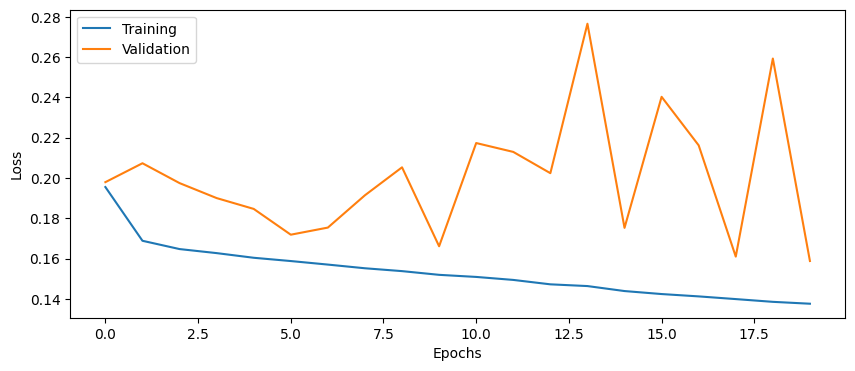

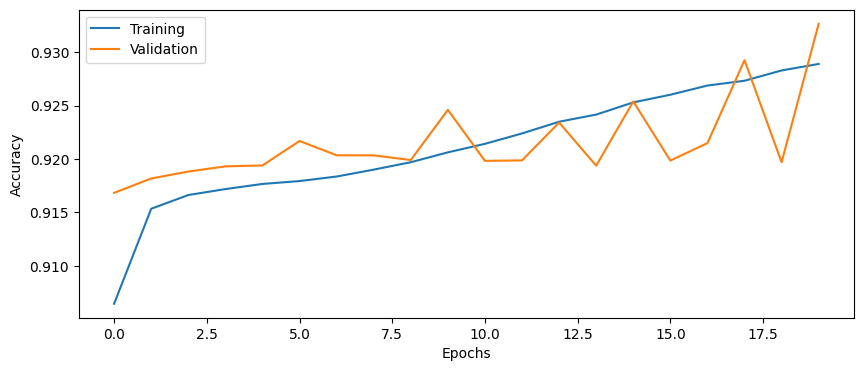

In [22]:
# Setup some training and hyper-parameters
batch_size = 1000
epochs = 20

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Build and train model
model_config = {
    'learning_rate': learning_rate,
    'input_shape': input_shape,
    'loss': loss,
    'act_fun': 'sigmoid',
    'n_hidden_layers': 2,
    'n_hidden_units': 20,
    'use_bn': True
}
train_config = {
    'batch_size': batch_size,
    'epochs': epochs,
    'class_weight': class_weights
}

history6 = train_DNN( model_config, (Xtrain, Ytrain, Xval, Yval), train_config)

# Evaluate model on test data
score = history6.model.evaluate(Xtest, Ytest)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history6)

#### **2.3.2 Activation function**

Try changing the activation function in each layer from sigmoid to [ReLU](https://keras.io/api/layers/activations/).

**Note**: the last layer should still have a sigmoid activation function.

### 2 hidden layers, 20 nodes each, class weights, ReLU and no batch normalization

activation function:  relu
optimizer:  sgd
use_bn:  False
use_dropout:  False
Epoch 1/20
535/535 [==============================] - 2s 3ms/step - loss: 0.1960 - accuracy: 0.9035 - val_loss: 0.2175 - val_accuracy: 0.9127
Epoch 2/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1686 - accuracy: 0.9131 - val_loss: 0.2109 - val_accuracy: 0.9173
Epoch 3/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1639 - accuracy: 0.9159 - val_loss: 0.1974 - val_accuracy: 0.9184
Epoch 4/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1614 - accuracy: 0.9166 - val_loss: 0.2043 - val_accuracy: 0.9189
Epoch 5/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1619 - accuracy: 0.9167 - val_loss: 0.2024 - val_accuracy: 0.9187
Epoch 6/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1587 - accuracy: 0.9174 - val_loss: 0.1898 - val_accuracy: 0.9197
Epoch 7/20
535/535 [==============================] - 1s 2ms/step - lo

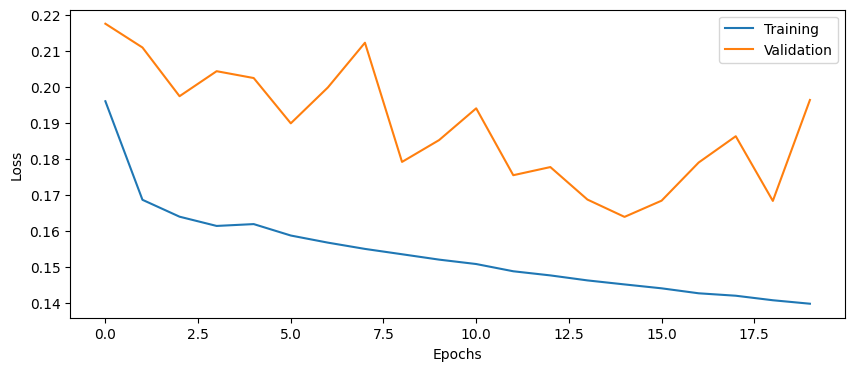

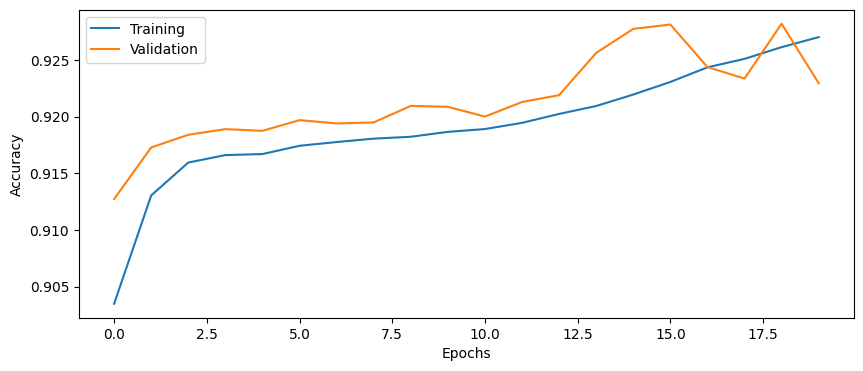

In [28]:
# Setup some training and hyper-parameters
batch_size = 1000
epochs = 20

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Build and train model
model_config = {
    'learning_rate': learning_rate,
    'input_shape': input_shape,
    'loss': loss,
    'act_fun': 'relu',
    'n_hidden_layers': 2,
    'n_hidden_units': 20,
    'use_bn': False,
    'print_args': True
}
train_config = {
    'batch_size': batch_size,
    'epochs': epochs,
    'class_weight': class_weights
}

history7 = train_DNN( model_config, (Xtrain, Ytrain, Xval, Yval), train_config)

# Evaluate model on test data
score = history7.model.evaluate(Xtest, Ytest)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history7)

#### **2.3.3 Optimizer**

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from [keras.optimizers](https://keras.io/optimizers/). 

### 2 hidden layers, 20 nodes each, class weights, Adam optimizer, no batch normalization, sigmoid activations

activation function:  sigmoid
optimizer:  adam
use_bn:  False
use_dropout:  False
Epoch 1/20
535/535 [==============================] - 2s 3ms/step - loss: 0.1737 - accuracy: 0.9117 - val_loss: 0.1901 - val_accuracy: 0.9187
Epoch 2/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1636 - accuracy: 0.9162 - val_loss: 0.2185 - val_accuracy: 0.9146
Epoch 3/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1625 - accuracy: 0.9164 - val_loss: 0.1861 - val_accuracy: 0.9177
Epoch 4/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1612 - accuracy: 0.9172 - val_loss: 0.2075 - val_accuracy: 0.9177
Epoch 5/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1605 - accuracy: 0.9175 - val_loss: 0.2005 - val_accuracy: 0.9202
Epoch 6/20
535/535 [==============================] - 1s 2ms/step - loss: 0.1601 - accuracy: 0.9176 - val_loss: 0.1915 - val_accuracy: 0.9195
Epoch 7/20
535/535 [==============================] - 1s 2ms/step 

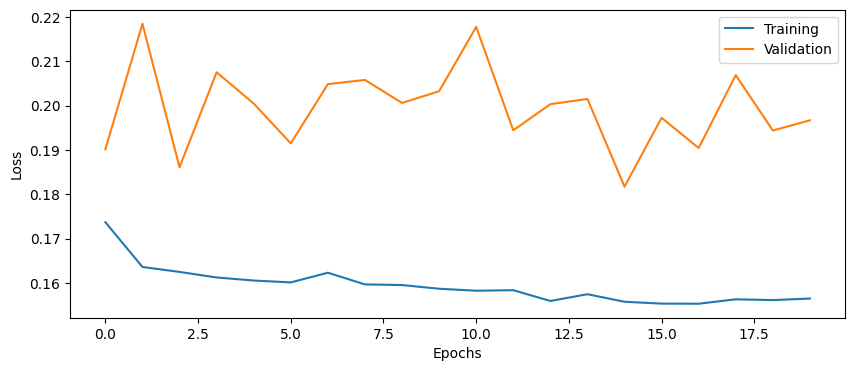

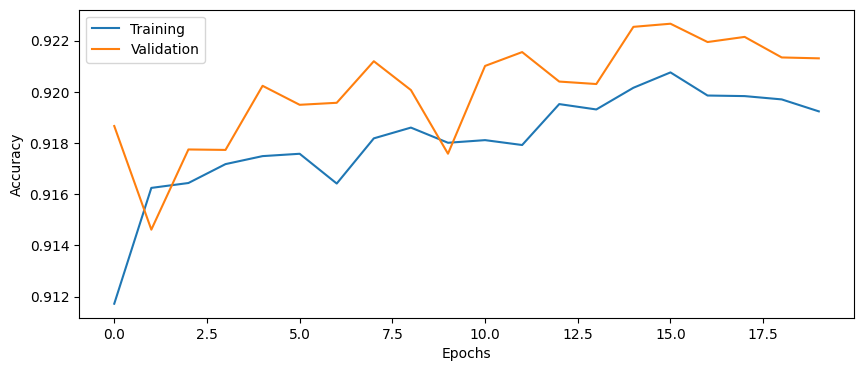

In [29]:



# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Build and train model
model_config = {
    'learning_rate': learning_rate,
    'input_shape': input_shape,
    'loss': loss,
    'act_fun': 'sigmoid',
    'n_hidden_layers': 2,
    'n_hidden_units': 20,
    'optimizer': 'adam',
    'print_args': True
}

train_config = {
    'batch_size': batch_size,
    'epochs': epochs,
    'class_weight': class_weights
}

history8 = train_DNN( model_config, (Xtrain, Ytrain, Xval, Yval), train_config)

# Evaluate model on test data
score = history8.model.evaluate(Xtest, Ytest)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history8)

#### 2.3.4 **Dropout regularization**

Dropout is a type of regularization that can improve accuracy for validation and test data. It randomly removes connections to force the neural network to not rely too much on a small number of weights.

Add a Dropout layer after each Dense layer (but not after the final dense layer) in `build_DNN`, with a dropout probability of 50%. Look at the [documentation](https://keras.io/api/layers/regularization_layers/dropout/) for more information on how to call set this layer.

#### **<span style="color:red">Questions</span>**
12. How does the validation accuracy change when adding dropout?
13. How does the test accuracy change when adding dropout?

#### **<span style="color:green">Answers</span>**
12. The validation accuracy is lower compared to using batch normalization but a bit higher than using no regularization. The improvment during the training is more stable than for batch normalization though.  
13. For the used hyperparameters the test accuracy is lower than for previous runs.

### 2 hidden layers with 20 nodes each, class weights, dropout, SGD optimizer, no batch normalization and sigmoid activations

Epoch 1/50
535/535 [==============================] - 2s 2ms/step - loss: 0.4622 - accuracy: 0.7703 - val_loss: 0.2720 - val_accuracy: 0.8823
Epoch 2/50
535/535 [==============================] - 1s 2ms/step - loss: 0.2870 - accuracy: 0.8726 - val_loss: 0.2613 - val_accuracy: 0.8891
Epoch 3/50
535/535 [==============================] - 1s 2ms/step - loss: 0.2571 - accuracy: 0.8807 - val_loss: 0.2495 - val_accuracy: 0.8954
Epoch 4/50
535/535 [==============================] - 1s 2ms/step - loss: 0.2399 - accuracy: 0.8853 - val_loss: 0.2421 - val_accuracy: 0.8981
Epoch 5/50
535/535 [==============================] - 1s 2ms/step - loss: 0.2292 - accuracy: 0.8885 - val_loss: 0.2393 - val_accuracy: 0.8988
Epoch 6/50
535/535 [==============================] - 1s 2ms/step - loss: 0.2209 - accuracy: 0.8911 - val_loss: 0.2358 - val_accuracy: 0.8996
Epoch 7/50
535/535 [==============================] - 1s 2ms/step - loss: 0.2151 - accuracy: 0.8939 - val_loss: 0.2341 - val_accuracy: 0.9020
Epoch 

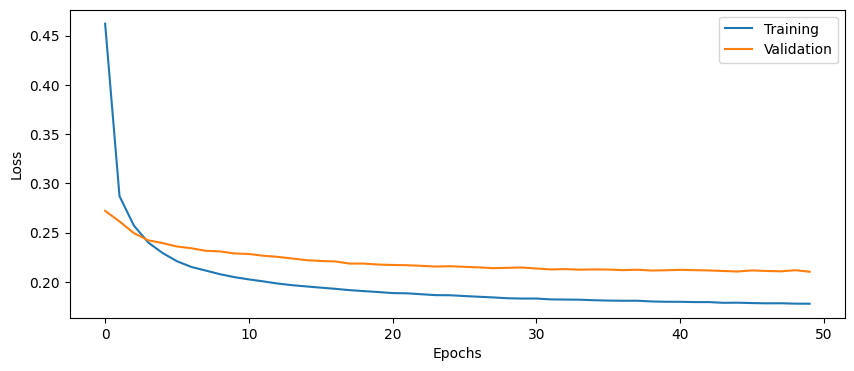

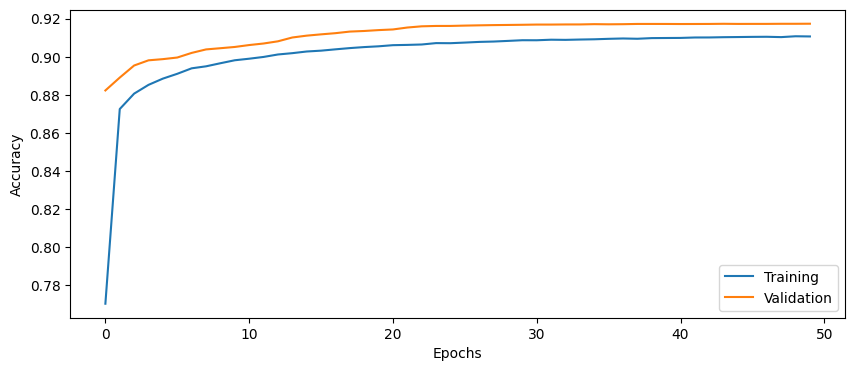

In [26]:
epochs = 50
  

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Build and train model
model_config = {
    'learning_rate': learning_rate,
    'input_shape': input_shape,
    'loss': loss,
    'act_fun': 'sigmoid',
    'n_hidden_layers': 2,
    'n_hidden_units': 20,
    'use_dropout': True
}

train_config = {
    'batch_size': batch_size,
    'epochs': epochs,
    'class_weight': class_weights
} 

history9 = train_DNN( model_config, (Xtrain, Ytrain, Xval, Yval), train_config)

# Evaluate model on test data
score = history9.model.evaluate(Xtest, Ytest)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history9)

# Part 3:  Hyper parameter tuning

### **3.1 Manual hyper parameter tuning**
Spend some time (20 to 30 minutes) tuning the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?

#### **<span style="color:red">Question</span>**
14. How high classification accuracy can you achieve for the test data? What is your best configuration?
   
#### **<span style="color:green">Answers</span>**
[Your answers here]

In [10]:
num_layers = [2, 4, 6]
num_units = [20, 50, 100]
optimizers = ['adam', 'sgd']
activations = ['sigmoid', 'relu']
epochs = [20, 50]
batch_size = [1000, 10000]

In [48]:
# Setup some training and hyper-parameters
batch_size = 1000
epochs = 20

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Specify the learning rate, the input shape and the loss function
learning_rate = 0.1
input_shape = Xtrain.shape[1]
loss = "binary_crossentropy"

model_config = {
    'learning_rate': learning_rate,
    'input_shape': input_shape,
    'loss': loss,
    'act_fun': 'sigmoid',
    'n_hidden_layers': 10,
    'n_hidden_units': 40,
    'optimizer': 'sgd',
    'use_bn': False,
    'use_dropout': True,
}
train_config = {
    'batch_size': batch_size,
    'epochs': epochs,
    'class_weight': class_weights
}
# Train the model, provide training data and validation data
history = train_DNN( model_config, (Xtrain, Ytrain, Xval, Yval), train_config)

# Evaluate model on test data
score = history.model.evaluate(Xtest, Ytest)

Epoch 1/20
535/535 [==============================] - 4s 5ms/step - loss: 0.7042 - accuracy: 0.4978 - val_loss: 0.6856 - val_accuracy: 0.8404
Epoch 2/20
535/535 [==============================] - 3s 5ms/step - loss: 0.6936 - accuracy: 0.4970 - val_loss: 0.6881 - val_accuracy: 0.8404
Epoch 3/20
535/535 [==============================] - 3s 5ms/step - loss: 0.6935 - accuracy: 0.4981 - val_loss: 0.7018 - val_accuracy: 0.1596
Epoch 4/20
535/535 [==============================] - 3s 5ms/step - loss: 0.6934 - accuracy: 0.5065 - val_loss: 0.7158 - val_accuracy: 0.1596
Epoch 5/20
535/535 [==============================] - 3s 5ms/step - loss: 0.6934 - accuracy: 0.4963 - val_loss: 0.7060 - val_accuracy: 0.1596
Epoch 6/20
535/535 [==============================] - 3s 5ms/step - loss: 0.6934 - accuracy: 0.4957 - val_loss: 0.6948 - val_accuracy: 0.1596
Epoch 7/20
535/535 [==============================] - 3s 5ms/step - loss: 0.6934 - accuracy: 0.4956 - val_loss: 0.6716 - val_accuracy: 0.8404
Epoch 

KeyboardInterrupt: 

In [8]:
history.history

NameError: name 'history' is not defined

Test loss: 0.7207
Test accuracy: 0.1578


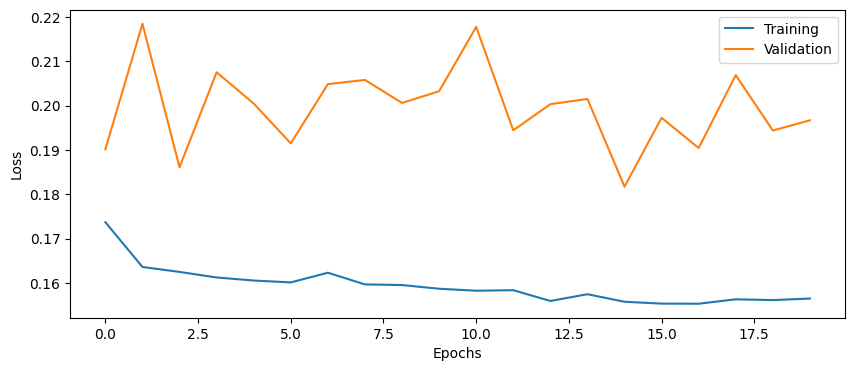

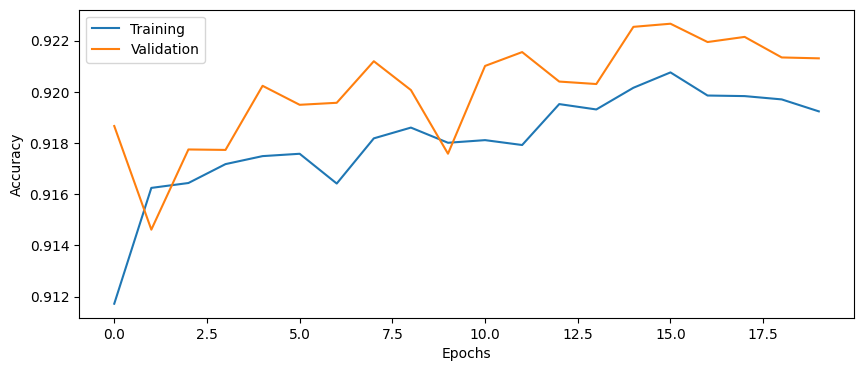

In [47]:
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(history8)

In [ ]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Build and train model
best_model = ???

best_history = ???
# Evaluate model on test data
best_score = ???

# ============================================

print('Test loss: %.4f' % best_score[0])
print('Test accuracy: %.4f' % best_score[1])

# Plot the history from the training run
plot_results(history)


### **3.2 Automatic hyper parameter search**
The number of hyper parameters that can be tried manually is limited and the process of trying out the different combinations and keeping track of them is time consuming and tedious. Today, there are several libraries available for automatic hyper parameter tuning (see an extensive list [here](https://github.com/balavenkatesh3322/hyperparameter_tuning)). The library that we will use in this lab is `Ray Tune` which can be integrated with many of the deep learning APIs available today (for the full description of the library capabilities see the [documentation](https://docs.ray.io/en/latest/tune/index.html)).


To use the `Ray Tune` functionality we need a function that defines the model training. This will then be used in a wrapper function that defines the hyper parameter search space, the resources available for running the search and the search algorithm. 

Start by implementing the `train_DNN` function in the `utilities.py` file (more detailed instructions are available in `utilities.py`). In the cell below, you can set up the search space and a `tune` ray object that takes the `train_DNN`. The tuner will set `train_DNN`, will select a set of hyper parameters and train several models for us (more information [here](https://docs.ray.io/en/latest/tune/key-concepts.html?_gl=1*j3ryje*_up*MQ..*_ga*NzQyMjIzNzg4LjE3MzY0MTk5MzY.*_ga_0LCWHW1N3S*MTczNjQxOTkzNS4xLjAuMTczNjQxOTkzNS4wLjAuMA..#tune-60-seconds)). 


`Ray Tune` library provides several types of hyper parameter search algorithms, including random and grid search, and Bayesian optimization. In this lab we will be using the [`Bayesian Optimization`](https://docs.ray.io/en/latest/tune/api/doc/ray.tune.search.bayesopt.BayesOptSearch.html?_gl=1*qcz1fo*_up*MQ..*_ga*NzQyMjIzNzg4LjE3MzY0MTk5MzY.*_ga_0LCWHW1N3S*MTczNjQyNDEyMy4yLjEuMTczNjQyNDI0Ny4wLjAuMA..#ray.tune.search.bayesopt.BayesOptSearch) searching algorithm (additional information about this method can be found [here](https://www.cs.cornell.edu/courses/cs4787/2019sp/notes/lecture16.pdf)).

#### **<span style="color:red">Question</span>**
15. Run the automatic hyper parameter search with range of possible hyper parameter values as in your manual search. Does the automatic search set of parameters match those that you have found?
16. What are the benefits and drawbacks of automatic hyper parameter search?
   
#### **<span style="color:green">Answers</span>**
15. The result from our manual  search showed that regularization with batch norm and dropout does not lead to a better validation accuracy. Therefore, we set the both to False for the automatic search. We started two additional automatic searches with one of the regularization techniques turned to True and differently to our manual search using dropout was able to achieve the best validation accuracy, together with 6 hidden layers with 50 hidden nodes each. This is also contrary to our manual search, as it seemed to work better with fewer layers and units.

In [63]:
# import train_DNN
from utilities import train_DNN_tune

# imports for hyperparameter tuning
from ray import tune, train
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune.search.bayesopt import BayesOptSearch

#import os
#from tensorboardX import SummaryWriter

#logdir = os.path.abspath("C:/ray_results/logs")  # Use an absolute, short path
#writer = SummaryWriter(logdir=logdir)

# --------------------------------------------  
# === Your code here =========================
# --------------------------------------------

# Define the hyper parameter, both those that should be searched and those that are fixed.
#  Hyperparameters to search are: act_fun, optimizer, use_bn, n_hidden_layers and n_hidden_units.
# The remaining parameters can be set to fixed values (This is to reduce the search space and time).
# Add the batch size and epochs so that the train_DNN can access them.
hyperparameter_space =  {
            "act_fun": tune.choice(["s", "r"]),
            "optimizer": tune.choice(["sgd", "adam"]),
            "use_bn": tune.choice([True, False]),
            "n_hidden_layers": tune.choice([2, 4, 6, 10]),
            "n_hidden_units": tune.choice([20, 50, 100]),
            
            # here define the fixed parameters
            "loss": "binary_crossentropy", 
            "learning_rate": 0.1,
            "use_bn": True,
            "use_dropout": False,
            "use_custom_dropout": False,
            "use_variational_layer": False,
            "input_shape": Xtrain.shape[1],
        }

# specify batch and number of epochs
training_config = {
            "epochs": 20,
            "batch_size": 1000,
            "class_weight": class_weights
        }

# specify the number of samples to take from the hyper parameter space and run. The larger the number, the longer the search time.
# Start small (e.g. 2) to test your implementation, then increase.
num_samples = 50

# --------------------------------------------


# Specification of the search algorithm
bayesopt = BayesOptSearch(metric="mean_accuracy", mode="max")

# Definition of the Scheduler. This allows for several models to be trained/stopped/re-started simultaneously 
sched = AsyncHyperBandScheduler(
        time_attr="training_iteration", max_t=100, grace_period=20
    )

# Setting up the tuner.
tuner = tune.Tuner(
        tune.with_resources(train_DNN_tune, resources={"cpu": 12, "gpu":0}), # definition of which training function to use and the available resources. Consider adding "gpu":0 to resources if available.
        tune_config=tune.TuneConfig(
            search_alg=bayesopt,
            scheduler=sched,
            trial_dirname_creator="1"
        ),
        run_config=train.RunConfig(
            name="DNN_hp_tuning",
            stop={"mean_accuracy": 1},
        ),
    )

# Run the hyper parameter search.
data = (Xtrain, Ytrain, Xval, Yval)
analysis0 = tune.run(
        tune.with_parameters(train_DNN_tune, data=data, training_config=training_config),
        verbose=1,
        config=hyperparameter_space,
        num_samples=num_samples,
        storage_path='C:\\ray'
        )


2025-02-28 16:48:43,376	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\jakob\AppData\Local\Temp\ray\session_2025-02-28_13-05-29_309809_25788\artifacts\2025-02-28_16-48-43\train_DNN_tune_2025-02-28_16-48-43\driver_artifacts\train_DNN_tune_7cdd3_00000_0_act_fun=r,n_hidden_layers=4,n_hidden_units=50,optimizer=adam_2025-02-28_16-48-43
2025-02-28 16:48:43,378	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\jakob\AppData\Local\Temp\ray\session_2025-02-28_13-05-29_309809_25788\artifacts\2025-02-28_16-48-43\train_DNN_tune_2025-02-28_16-48-43\driver_artifacts\train_DNN_tune_7cdd3_00000_0_act_fun=r,n_hidden_layers=4,n_hidden_units=50,optimizer=adam_2025-02-28_16-48-43
2025-02-28 16:48:43,384	WARNING trial.py:647 -- The path to the trial log directory is too long (m

In [ ]:
# Show the best hyper parameter configuration that was found
best_configuration = analysis0.get_best_config(metric="_metric",mode='max')
for k, v in best_configuration.items():
    print(f"{k}: {v}")

# Print its accuracy
analysis0_df = analysis0.dataframe()
print(f'\nBest configuration accuracy: {analysis0_df.iloc[analysis0_df["_metric"].idxmax()]["_metric"]}')

act_fun: r
optimizer: sgd
use_bn: True
n_hidden_layers: 10
n_hidden_units: 100
loss: binary_crossentropy
learning_rate: 0.1
use_dropout: False
use_custom_dropout: False
use_variational_layer: False
input_shape: 92

Best configuration accuracy: 0.9413021802902222


In [11]:
config = {
    "act_fun": "r",
    "optimizer": "sgd",
    "use_bn": True,
    "n_hidden_layers": 10,
    "n_hidden_units": 100,
    "loss": "binary_crossentropy",
    "learning_rate": 0.1,
    "use_dropout": False,
    "use_custom_dropout": False,
    "use_variational_layer": False,
    "input_shape": Xtrain.shape[1]
}

train_config = {
    "epochs": 20,
    "batch_size": 1000,
    "class_weight": class_weights
}


best_model = train_DNN(config, (Xtrain, Ytrain, Xval, Yval), train_config)

Epoch 1/20

535/535 [==============================] - 7s 10ms/step - loss: 0.1920 - accuracy: 0.9104 - val_loss: 0.1845 - val_accuracy: 0.9206
Epoch 2/20
 21/535 [>.............................] - ETA: 4s - loss: 0.1625 - accuracy: 0.9181

c:\Users\jakob\Documents\venvs\732A82\Lib\site-packages\ray\train\_internal\session.py:652: UserWarning: `report` is meant to only be called inside a function that is executed by a Tuner or Trainer. Returning `None`.
  warnings.warn(


535/535 [==============================] - 5s 9ms/step - loss: 0.1590 - accuracy: 0.9195 - val_loss: 0.1739 - val_accuracy: 0.9278
Epoch 3/20
535/535 [==============================] - 5s 9ms/step - loss: 0.1465 - accuracy: 0.9249 - val_loss: 0.2033 - val_accuracy: 0.9228
Epoch 4/20
535/535 [==============================] - 5s 9ms/step - loss: 0.1370 - accuracy: 0.9296 - val_loss: 0.2126 - val_accuracy: 0.9256
Epoch 5/20
535/535 [==============================] - 5s 10ms/step - loss: 0.1332 - accuracy: 0.9315 - val_loss: 0.1587 - val_accuracy: 0.9339
Epoch 6/20
535/535 [==============================] - 5s 10ms/step - loss: 0.1286 - accuracy: 0.9335 - val_loss: 0.1691 - val_accuracy: 0.9349
Epoch 7/20
535/535 [==============================] - 5s 10ms/step - loss: 0.1263 - accuracy: 0.9352 - val_loss: 0.1493 - val_accuracy: 0.9396
Epoch 8/20
535/535 [==============================] - 5s 10ms/step - loss: 0.1238 - accuracy: 0.9365 - val_loss: 0.1680 - val_accuracy: 0.9362
Epoch 9/20
53

3582/3582 [==============================] - 3s 970us/step - loss: 0.1575 - accuracy: 0.9396
Test loss: 0.1575
Test accuracy: 0.9396


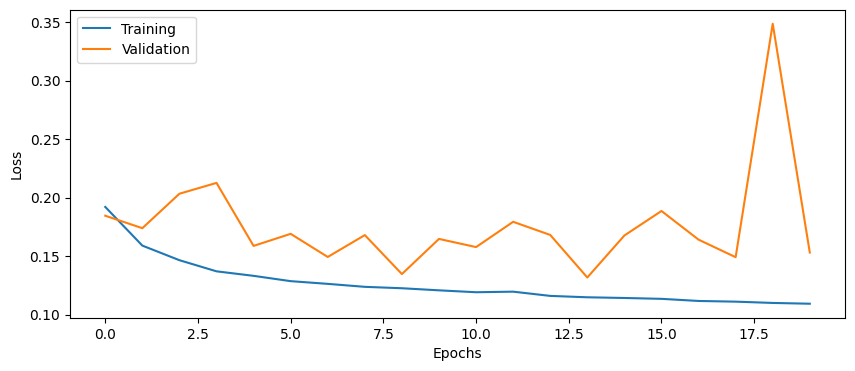

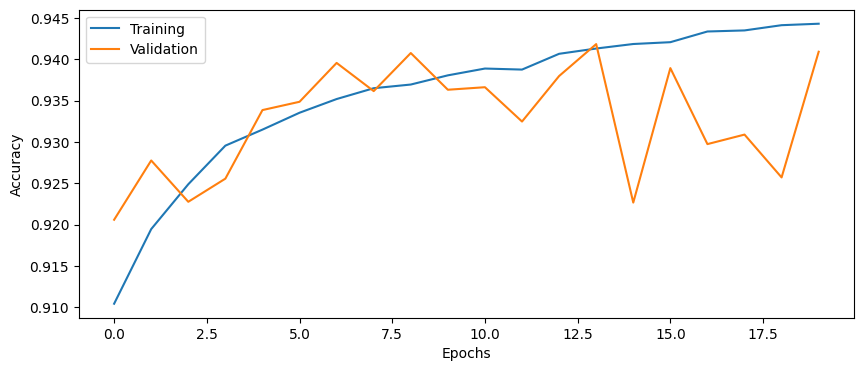

In [12]:
score = best_model.model.evaluate(Xtest, Ytest)

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(best_model)

# Part 4: Uncertainty quantification

In the next sections you will explore three methods for model uncertainty estimation:
- Monte Carlo dropout where we take advantage of the dropout layer during inference time.
- Cross validation where we train several models on different splits of data.
- Bayesian neural networks (BNN) where we modify our model definition to allow the model to learn distributions over weights and the output. 

**!Note**: through the next sections, use your best model configuration that you found through hyper parameter tuning (either manual or automatic).

### **4.1 Dropout uncertainty**

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this [paper](http://proceedings.mlr.press/v48/gal16.pdf)

To achieve this, we need to redefine the Keras Dropout. This was already done for you and it is available in `utilities.py` under `myDropout`. Adapt the `build_DNN` function to two boolean arguments, use_dropout and use_custom_dropout; add a standard Dropout layer if use_dropout is true, add a `myDropout` layer if use_custom_dropout is true.

Run the same test data through the trained network 100 times, with dropout turned on. 


In [13]:
from utilities import train_DNN
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Your best training parameters
batch_size = 1000
epochs = 20
input_shape = Xtrain.shape[1]
loss = "binary_crossentropy"
learning_rate = 0.1

# Build and train model
model_config = {
    "act_fun": "r",
    "optimizer": "sgd",
    "use_bn": True,
    "n_hidden_layers": 10,
    "n_hidden_units": 100,
    "loss": "binary_crossentropy",
    "learning_rate": 0.1,
    "use_dropout": True,
    "use_custom_dropout": True,
    "use_variational_layer": False,
    "input_shape": Xtrain.shape[1]
}

train_config = {
    "epochs": 20,
    "batch_size": 1000,
    "class_weight": class_weights
}
# Train the model, provide training data and validation data
history10 = train_DNN( model_config, (Xtrain, Ytrain, Xval, Yval), train_config)



Epoch 1/20
535/535 [==============================] - 10s 15ms/step - loss: 0.6419 - accuracy: 0.7837 - val_loss: 0.5029 - val_accuracy: 0.8404
Epoch 2/20
535/535 [==============================] - 8s 15ms/step - loss: 0.5731 - accuracy: 0.8632 - val_loss: 0.4754 - val_accuracy: 0.8404
Epoch 3/20
535/535 [==============================] - 8s 14ms/step - loss: 0.5167 - accuracy: 0.8749 - val_loss: 0.4448 - val_accuracy: 0.8404
Epoch 4/20
535/535 [==============================] - 8s 14ms/step - loss: 0.4167 - accuracy: 0.8823 - val_loss: 0.4237 - val_accuracy: 0.8480
Epoch 5/20
535/535 [==============================] - 8s 15ms/step - loss: 0.3537 - accuracy: 0.8914 - val_loss: 0.3334 - val_accuracy: 0.8728
Epoch 6/20
535/535 [==============================] - 8s 14ms/step - loss: 0.3132 - accuracy: 0.8950 - val_loss: 0.2459 - val_accuracy: 0.8976
Epoch 7/20
535/535 [==============================] - 8s 15ms/step - loss: 0.2841 - accuracy: 0.8971 - val_loss: 0.2143 - val_accuracy: 0.908

In [14]:
# Run this cell a few times to evalute the model on test data, 
# if you get slightly different test accuracy every time, Dropout during testing is working

# Evaluate model on test data
score = history10.model.evaluate(Xtest, Ytest, verbose=0)
                       
print('Test accuracy: %.4f' % score[1])

Test accuracy: 0.9139


In [15]:
# ============================================
# === Your code here =========================
# ============================================
# Run the testing 100 times, and save the accuracies in an array
accs = [history10.model.evaluate(Xtest, Ytest, verbose=0)[1] for _ in range(100)]

# Calculate and print mean and std of accuracies
print(np.mean(accs), np.std(accs))

# ============================================

0.9139684695005417 0.0001267350697988975


### **4.2: Cross validation uncertainty**

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a [help function from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) to setup the CV. Use 10 folds with shuffling, random state 1234. 

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.


In [16]:
from sklearn.model_selection import StratifiedKFold

random_state = 1234 
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Define 10-fold cross validation
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
folds = skf.split(X, Y)
# Define where to save the test accuracies
test_accuracies = []

# Loop over cross validation folds
for train_i, test_i in folds:
    X_train, X_test = X[train_i], X[test_i]
    Y_train, Y_test = Y[train_i], Y[test_i]

    # Calculate class weights for current split (remember to call the function using the input variable names e.g. class_weight='balanced', etc.)
    value1, value2 = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(Ytrain), y=Ytrain)
    class_weights = {0: value1, 1: value2}

    # Rebuild the DNN model, to not continue training on the previously trained model

    # Your best training parameters
    batch_size = 1000
    epochs = 20
    input_shape = Xtrain.shape[1]
    loss = "binary_crossentropy"
    learning_rate = 0.1

    # Build and train model
    model_config = {
        "act_fun": "r",
        "optimizer": "sgd",
        "use_bn": True,
        "n_hidden_layers": 10,
        "n_hidden_units": 100,
        "loss": "binary_crossentropy",
        "learning_rate": 0.1,
        "use_dropout": False,
        "use_custom_dropout": False,
        "use_variational_layer": False,
        "input_shape": Xtrain.shape[1]
    }

    train_config = {
        "epochs": 20,
        "batch_size": 1000,
        "class_weight": class_weights
    }
    

    # Fit the model with training set and class weights for this fold
    history = train_DNN( model_config, (Xtrain, Ytrain, Xval, Yval), train_config)
    
    # Evaluate the model using the test set for this fold
    score = history.model.evaluate(Xtest, Ytest, verbose=0)
    
    # Save the test accuracy in an array
    test_accuracies.append(score[1])

# Calculate and print mean and std of accuracies
print(np.mean(test_accuracies), np.std(test_accuracies))

# ============================================



Epoch 1/20
535/535 [==============================] - 8s 12ms/step - loss: 0.1924 - accuracy: 0.9107 - val_loss: 0.1980 - val_accuracy: 0.9187
Epoch 2/20
535/535 [==============================] - 6s 11ms/step - loss: 0.1597 - accuracy: 0.9183 - val_loss: 0.2064 - val_accuracy: 0.9194
Epoch 3/20
535/535 [==============================] - 6s 11ms/step - loss: 0.1488 - accuracy: 0.9238 - val_loss: 0.1763 - val_accuracy: 0.9259
Epoch 4/20
535/535 [==============================] - 6s 11ms/step - loss: 0.1399 - accuracy: 0.9283 - val_loss: 0.1715 - val_accuracy: 0.9301
Epoch 5/20
535/535 [==============================] - 6s 11ms/step - loss: 0.1349 - accuracy: 0.9302 - val_loss: 0.1800 - val_accuracy: 0.9312
Epoch 6/20
535/535 [==============================] - 6s 11ms/step - loss: 0.1327 - accuracy: 0.9312 - val_loss: 0.1875 - val_accuracy: 0.9257
Epoch 7/20
535/535 [==============================] - 6s 11ms/step - loss: 0.1280 - accuracy: 0.9340 - val_loss: 0.1692 - val_accuracy: 0.9351

### **4.3 Bayesian neural networks (BNN)**

Instead of mimicking Bayesian inference through MC dropout (see more details in this [paper](https://proceedings.mlr.press/v48/gal16.html)), what if we could build a model that can inherently give us a way to probe both model uncertainty (i.e. [epistemic uncertainty](https://link.springer.com/article/10.1007/s10994-021-05946-3) cause by few training samples) and data uncertainty (i.e. [aleatoric uncertainty](https://link.springer.com/article/10.1007/s10994-021-05946-3))? 

One way to achieve this is to train models to learn distributions over weights in the layers and over the output. This can be achieved by using TenssorFlow probability (see the [documentation](https://www.tensorflow.org/probability) for an in-depth description of all the functionalities). In this example we will only scratch the surface of the capabilities that a probabilistic deep learning approach has to offer, by addressing only model uncertainty. 

To start with, think about a BNN as an extension of your classical DNN, where during training instead of learning a weights for each 'connection' in the network, we ask the model to lean a distribution. After model training, during inference time, we sample from the learned distributions to obtain the weights used in the model in the forward pass. The modifications that we have to implement in our `build_DNN` function are the following:
- Substitute the hidden `Dense` layers with [`DenseVariational`](https://www.tensorflow.org/probability/api_docs/python/tfp/layers/DenseVariational) layers (this can be found under tensorflow-probability.layers). Do not forget to specify the `kl_weight` as 1/ number of iterations per epoch ([reference](https://arxiv.org/abs/1505.05424)). 
- Define the prior weights distribution (`make_prior_fn` input in the `DenseVariational`): this is the distribution that we expect the weights to have prior having seen the data. In this example we will not train the prior distribution.
- Define the posterior weights distribution (`make_posterior_fn` input in the `DenseVariational`): this is the distribution that we expect the model to learn during training. Since we do not know at priory which is the posterior distribution, we let it be very general (i.e. multivariate Gaussian distribution) which parameters are learned by the model. 

You will find the `BNN_prior` and `BNN_posterior` defined for you in the `utilities.py` file. Update the `build_DNN` to accept a new boolean input `use_variational_layer` that when true substitutes the hidden `Dense` layers with the `DenseVariational` layers. 

**!NOTE** As you will see, training the BNN model is more computationally demanding and is more prone to over-fitting. Reduce the learning rate and increase the number of epochs to address this issue.

#### **<span style="color:red">Questions</span>**
17. (MC dropout) What is the mean and the standard deviation of the test accuracy after evaluating the model on 100 times?
18. (CV) What is the mean and the standard deviation of the test accuracy?
19. (CV) What is the main advantage of dropout compared to CV for estimating test uncertainty? The difference may not be so large in this notebook, but imagine that you have a network that takes 24 hours to train.
20. (BNN) Build the BNN model and look at the number of parameters. Is there a difference between the previous DNN and the BNN? Why is that?
21. (BNN) Without training the model, evaluate the model a twice on the validation set: do you obtain the same validation accuracy? Why
22. Think of at least one advantage and one disadvantage for each of the three uncertainty estimation methods.
    
    
#### **<span style="color:green">Answer</span>**
[Your answers here]


In [38]:
Xtrain.shape[0]/batch_size

534.895

In [10]:
from utilities import train_DNN

Using the quarter of the dataset as the notebook crashed for the following task.

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np


# Load data from numpy arrays, choose reduced files if the training takes too long
# Load the dataset
X = np.load('Mirai_data_quarter.npy')
Y = np.load('Mirai_labels_quarter.npy')

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Remove the first 24 covariates (columns)
X = X[:,24:]
Y = Y


# Convert covariates to floats
X = X.astype(float)

# Convert labels to integers
Y = Y.astype(int)

# Remove mean of each covariate (column)
X = X - np.mean(X, axis=0)

# Divide each covariate (column) by its standard deviation
X = X / np.std(X, axis=0)


# split the original dataset into 70% Training and 30% Temp
Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Print the number of examples of each class, for the training data and the remaining 30%
print(np.unique(Ytrain, return_counts=True))
print(np.unique(Ytemp, return_counts=True))
# ============================================

print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))


# split the remaining 30% into 50% Validation and 50% Test
Xval, Xtest, Yval, Ytest = train_test_split(Xtemp, Ytemp, test_size=0.5, random_state=42)

# ============================================

print(f'The validation set has size {Xval.shape[0]}')
print(f'The test set has size {Xtest.shape[0]}')

(array([0, 1]), array([ 21387, 112337], dtype=int64))
(array([0, 1]), array([ 9019, 48292], dtype=int64))
Xtrain has size (133724, 92).
Ytrain has size (133724,).
Xtemp has size (57311, 92).
Ytemp has size (57311,).
The validation set has size 28655
The test set has size 28656


In [6]:
from sklearn.utils import class_weight

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Calculate class weights
value1, value2 = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(Ytrain), y=Ytrain)

# Print the class weights
print(value1, value2)

# ============================================

# Convert class weights into a dictionary that can be used as input to the model.fit() function

class_weights = {0: value1,
                1: value2}

3.1262916725113388 0.5951912548848554


In [4]:
from utilities import plot_results, train_DNN

In [7]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Your best training parameters
batch_size = 1000
epochs = 20
input_shape = Xtrain.shape[1]
loss = "binary_crossentropy"
learning_rate = 0.1

# Build and train model
model_config = {
    "act_fun": "r",
    "optimizer": "sgd",
    "use_bn": True,
    "n_hidden_layers": 10,
    "n_hidden_units": 100,
    "loss": "binary_crossentropy",
    "learning_rate": 0.1,
    "use_dropout": False,
    "use_custom_dropout": False,
    'use_variational_layer': True,
    'kl_weight': 1/(Xtrain.shape[0]/batch_size),
    "input_shape": Xtrain.shape[1]
}

train_config = {
    "epochs": 20,
    "batch_size": 1000,
    "class_weight": class_weights
}
    

# Fit the model with training set and class weights for this fold
history11 = train_DNN( model_config, (Xtrain, Ytrain, Xval, Yval), train_config)

# Evaluate the model using the test set for this fold
score = history.model.evaluate(Xtest, Ytest, verbose=0)
# ============================================


Epoch 1/20

  1/134 [..............................] - ETA: 44:39 - loss: 81.0621 - accuracy: 0.4330

KeyboardInterrupt: 

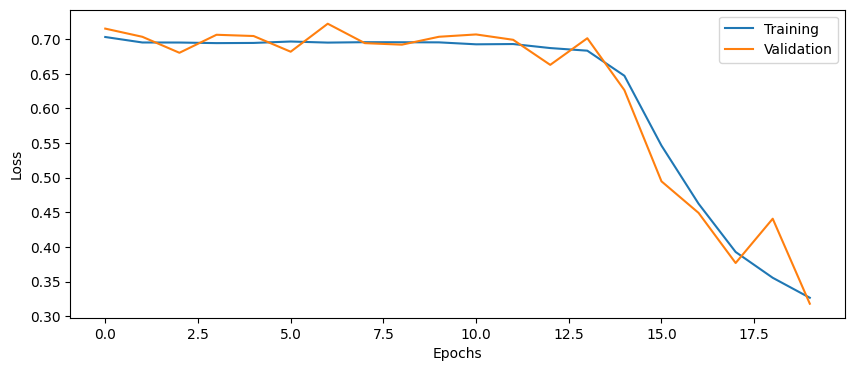

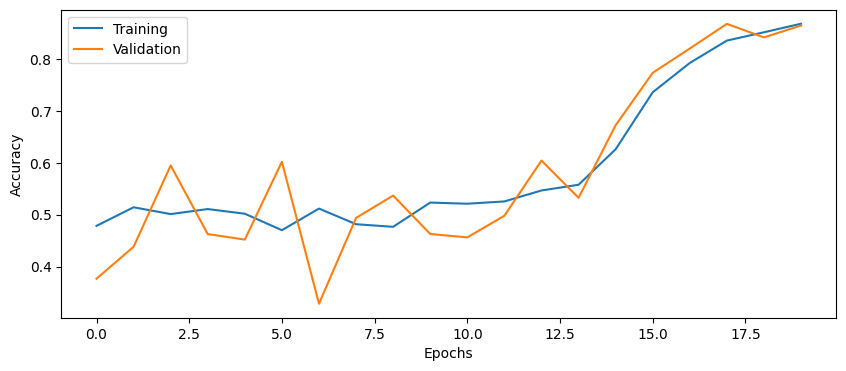

In [ ]:
# Plot the history from the training run
from utilities import plot_results
plot_results(history11) 

As we have done for the MC dropout uncertainty estimation, run the evaluation on the test set 100 times and show the mean and standard deviation.

In [ ]:
history11.model.evaluate(Xtest, Ytest, verbose=0)[1]

0.8737055063247681

In [ ]:
# ============================================
# === Your code here =========================
# ============================================
# Run the testing 100 times, and save the accuracies in an array

n_runs = 100

# Define where to save the test accuracies
test_accuracies = []
for _ in range(n_runs):
    # predict the test set
    
    # Save predictions
    test_accuracies.append(history11.model.evaluate(Xtest, Ytest, verbose=0)[1])
    
# Calculate and print mean and std of accuracies
print(np.mean(test_accuracies), np.std(test_accuracies))
# ============================================

0.8735377484560013 0.0009455768032271011


# Part 5: DNN for regression

A similar DNN can be used for regression, instead of classification.

#### **<span style="color:red">Questions</span>**
23. How would you change the DNN used in this lab in order to use it for regression instead?

#### **<span style="color:green">Answer</span>**
For regression the loss function must be changed to e.g. Mean Sqaured Error. Additionally, the output layer does not require an activation function anymore. 

## Report

Send in this jupyter notebook, with answers to all questions.